## Importar librerías

In [1]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

## Importar funciones personalizadas

In [2]:
%run pandas-missing-extension.ipynb

/home/demian/miniconda3/envs/CMDFI/lib/python3.9/site-packages/upsetplot/plotting.py:20: MatplotlibDeprecationWarning: The matplotlib.tight_layout module was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  from matplotlib.tight_layout import get_renderer


## Cargar los datos de NHANES

In [5]:
nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year="2017-2018")
    .clean_names(case_type = "snake")
)
nhanes_raw_df.shape

(8366, 197)

## Procesar los datos de NHANES

In [13]:
nhanes_df = (nhanes_raw_df
 .select_columns(
     "general_health_condition",
     "age_in_years_at_screening",
     "gender",
     "current_selfreported_height_inches",
     "current_selfreported_weight_pounds",
     "doctor_told_you_have_diabetes",
     "60_sec_pulse30_sec_pulse2",
     "total_cholesterol_mgdl"
 )
 .rename_columns(
     {
         "age_in_years_at_screening": "age",
         "current_selfreported_height_inches": "height",
         "current_selfreported_weight_pounds": "weight",
         "doctor_told_you_have_diabetes":  "diabetes",
         "60_sec_pulse30_sec_pulse2": "pulse",
         "total_cholesterol_mgdl": "total_cholesterol"
     }
 )
 .replace(
     {
         "height": {
             9999: np.nan,
             7777: np.nan
            },
         "weight": {
             9999: np.nan,
             7777: np.nan
            },
         "diabetes": {
             "Borderline": np.nan
            }
            
     }
 )
 .missing.sort_variables_by_missingness()
 .dropna(
     subset = ["diabetes"],
     how = "any"
 )
 .transform_column(
     column_name = "diabetes",
     function = lambda s: s.astype(int),
     elementwise = False
    )
)

nhanes_df

/home/demian/miniconda3/envs/CMDFI/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,height,weight,general_health_condition,total_cholesterol,pulse,diabetes,age,gender
SEQN,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,0,2.0,Female
93704.0,NaN,NaN,NaN,NaN,NaN,0,2.0,Male
93705.0,63.0,165.0,Good,157.0,52.0,0,66.0,Female
93706.0,68.0,145.0,Very good,148.0,82.0,0,18.0,Male
93707.0,NaN,NaN,Good,189.0,100.0,0,13.0,Male
...,...,...,...,...,...,...,...,...
102951.0,NaN,NaN,NaN,NaN,NaN,0,4.0,Male
102953.0,65.0,218.0,Fair or,182.0,78.0,0,42.0,Male
102954.0,66.0,150.0,Good,172.0,78.0,0,41.0,Female


## Visualizar los valores faltantes

/home/demian/miniconda3/envs/CMDFI/lib/python3.9/site-packages/missingno/missingno.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/home/demian/miniconda3/envs/CMDFI/lib/python3.9/site-packages/missingno/missingno.py:141: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot: >

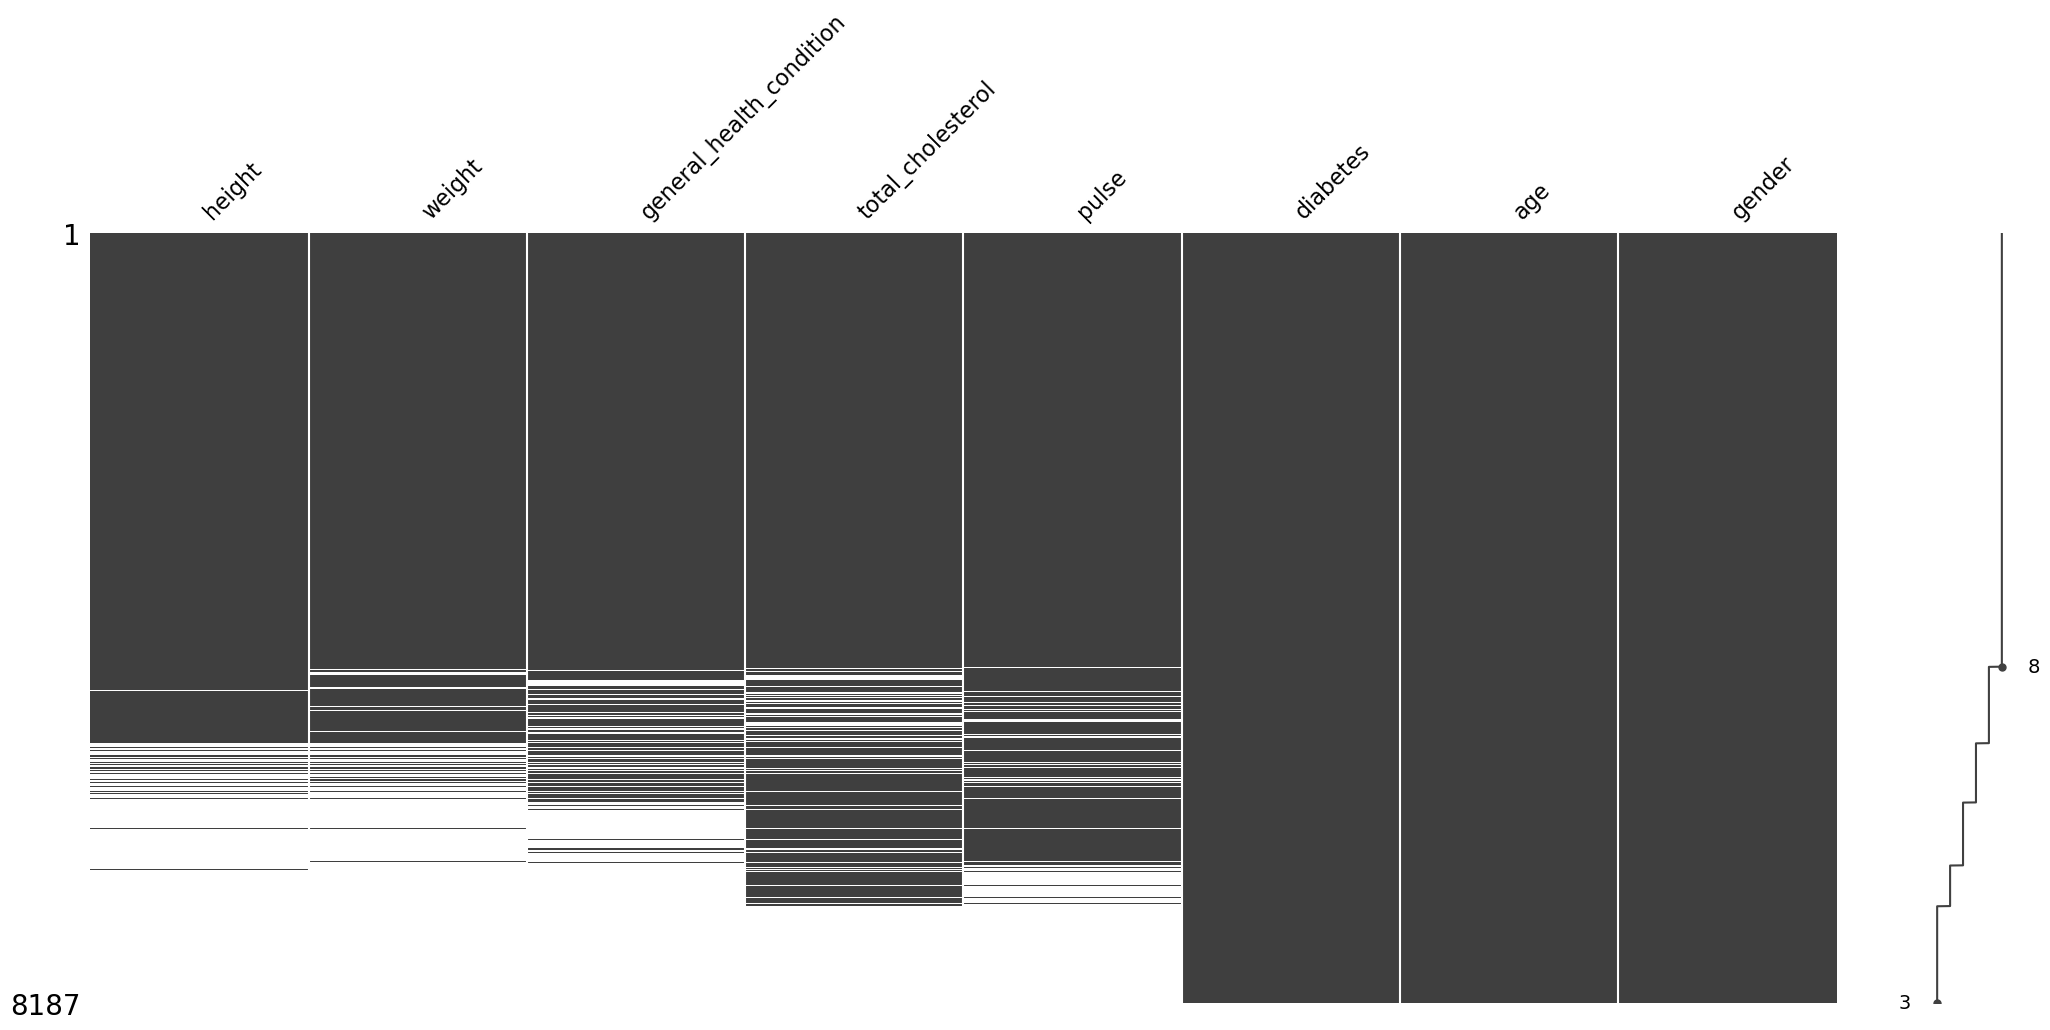

In [15]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort="descending")
)

/home/demian/miniconda3/envs/CMDFI/lib/python3.9/site-packages/upsetplot/plotting.py:580: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)
/home/demian/miniconda3/envs/CMDFI/lib/python3.9/site-packages/upsetplot/plotting.py:586: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)


{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

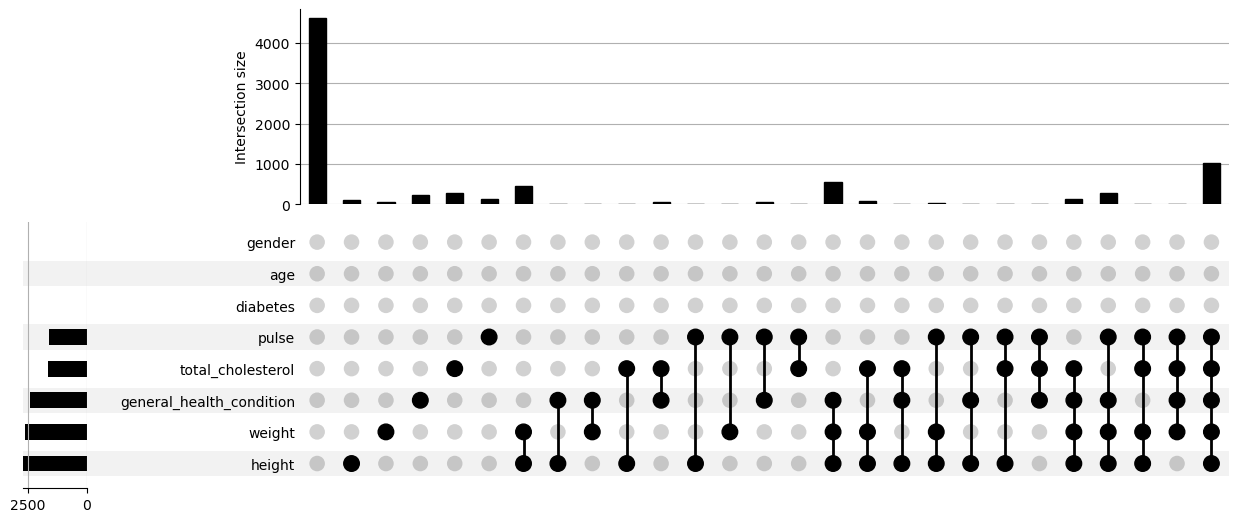

In [16]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)

/home/demian/miniconda3/envs/CMDFI/lib/python3.9/site-packages/missingno/missingno.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/home/demian/miniconda3/envs/CMDFI/lib/python3.9/site-packages/missingno/missingno.py:141: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot: >

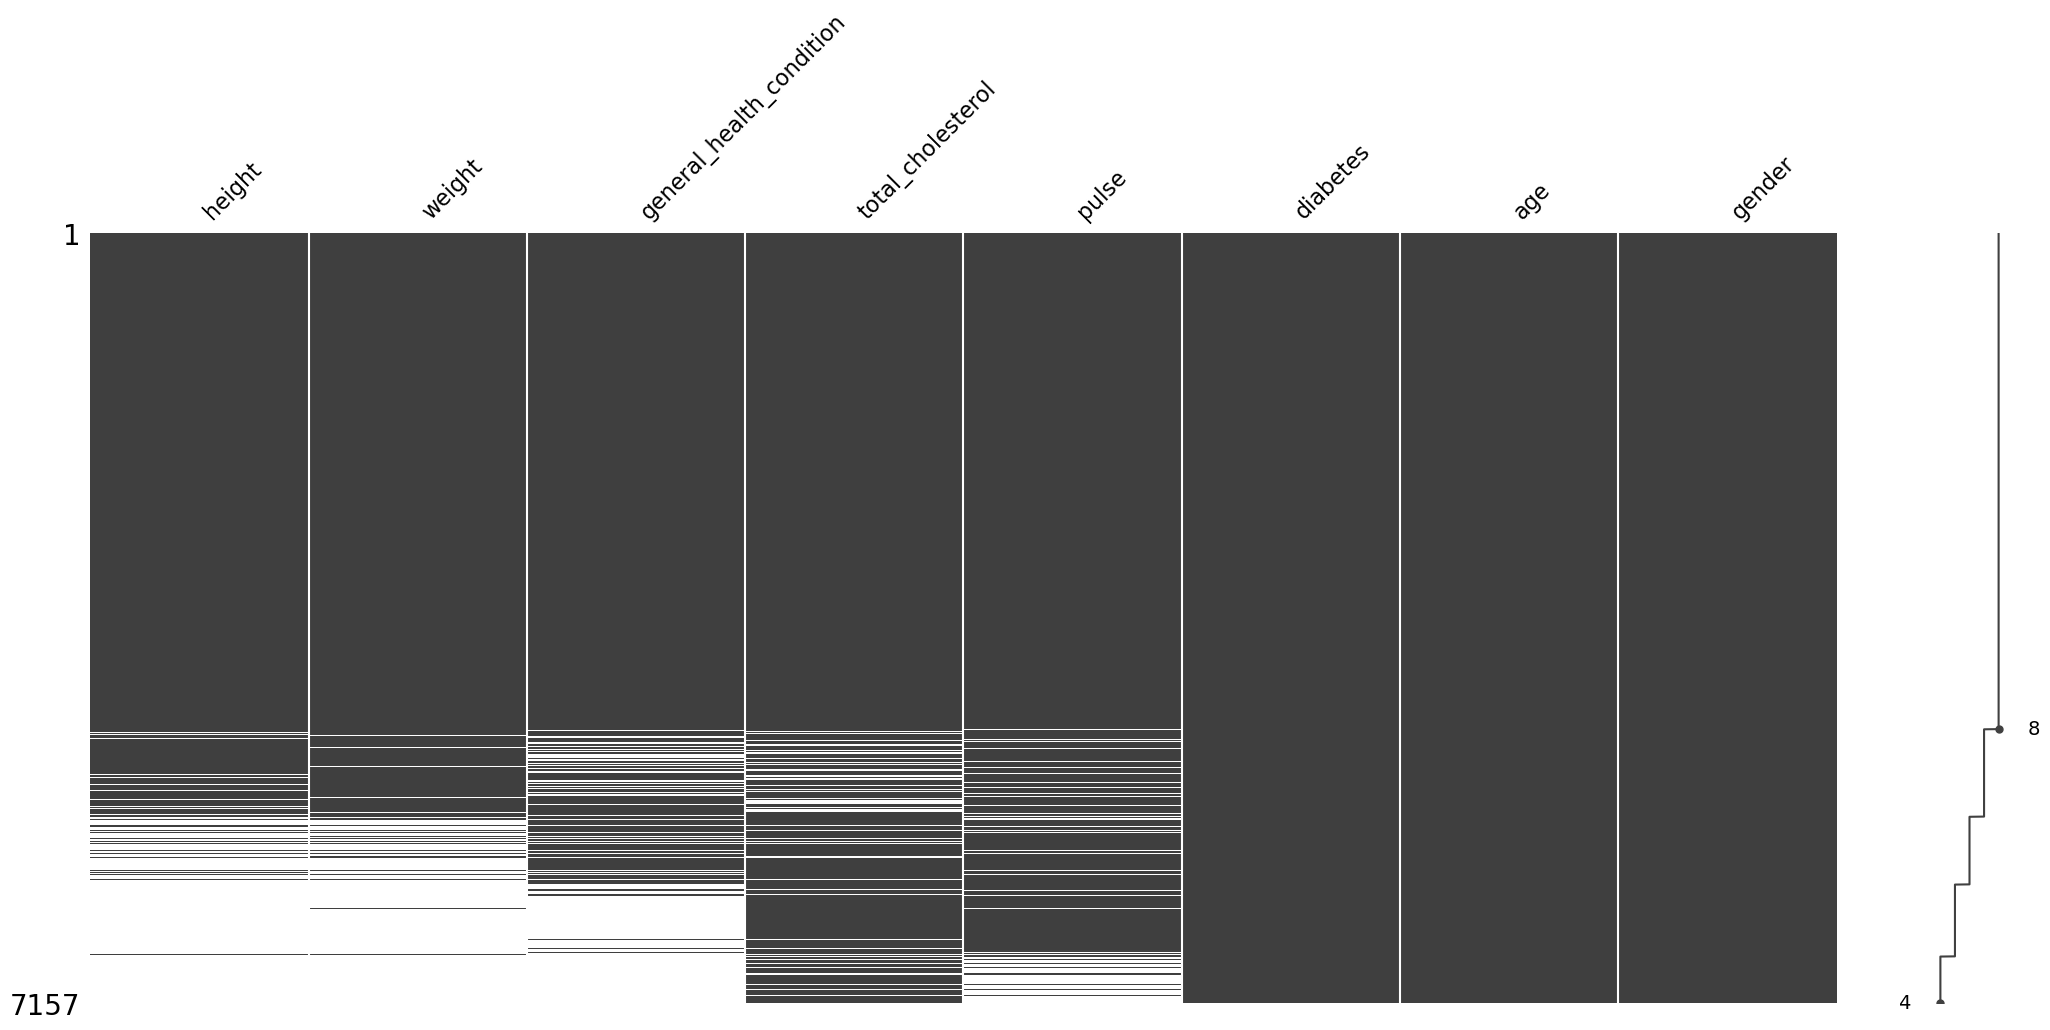

In [18]:
(
    nhanes_df
    .dropna(
        subset = ["pulse", "total_cholesterol", "general_health_condition", "weight", "height" ],
        how = "all"
    )
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort="descending")

)

## Eliminar valores faltantes

In [19]:
nhanes_df = (
    nhanes_df
    .dropna(
        subset = ["pulse", "total_cholesterol", "general_health_condition", "weight", "height" ],
        how = "all"
    )
    .missing.sort_variables_by_missingness()
)
nhanes_df.shape

(7157, 8)